# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Load Data

In [2]:
try:
    df = pd.read_csv('Dataset (1).csv')
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("Error: Please upload file .")


Dataset loaded successfully.
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

# Preprocessing
 Convert Diagnosis: M -> 1, B -> 0

In [3]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

#Clean data

In [4]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

print("Data after cleaning:")
print(df.head())


Data after cleaning:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...   

#Define Features
here Y= diagnois target and  X is other features or cloumn

In [5]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#Normalization
using min-max algortihm

In [6]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("\nFeature statistics after normalization:")
print(X_scaled.describe())


Feature statistics after normalization:
       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.37

#Split the data fro test , train and validations

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (455, 30)
Testing set shape: (114, 30)


#K mean clustering


In [8]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


--- K-Means Clustering Results ---
Crosstab of Actual Diagnosis vs Predicted Cluster:
Cluster                        0    1
Actual Diagnosis (0=B, 1=M)          
0                              9  348
1                            180   32


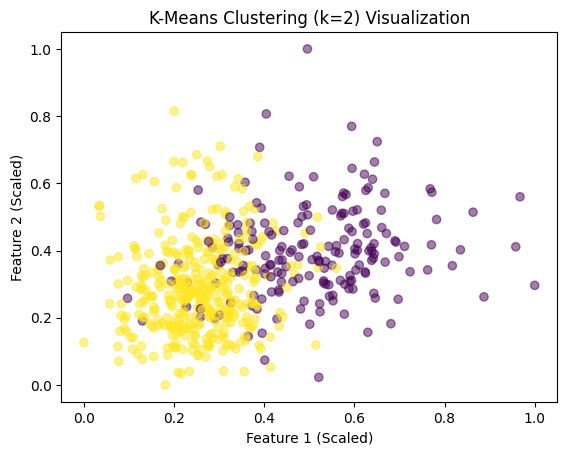

In [9]:

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# for ovservation adding this data frame to the cluster so that we can track how tow class are getting cluster

df['cluster'] = clusters


print("\n--- K-Means Clustering Results ---")
print("Crosstab of Actual Diagnosis vs Predicted Cluster:")
print(pd.crosstab(y, clusters, rownames=['Actual Diagnosis (0=B, 1=M)'], colnames=['Cluster']))

# Visualizing the classes
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('K-Means Clustering (k=2) Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

#KNN Classifier
training the model


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) #here we calling for prediections

#Evaluation

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- KNN Classification Performance ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


--- KNN Classification Performance ---
Accuracy:  0.9649
Precision: 0.9535
Recall:    0.9535
F1-Score:  0.9535

Confusion Matrix:
[[69  2]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

